In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
n = pd.read_csv('nodes_rich_2.csv')[['id', 'modularity_class']]
beers = pd.read_csv('beers.csv', encoding='utf-8')[['id', 'name', 'style']]

In [3]:
df = pd.merge(n, beers, on=['id'], how='inner')
df = df[['id', 'style', 'modularity_class']]
df.head()

,id,style,modularity_class
0,4680,Belgian Quad,6
1,64,Winter Warmer,6
2,431,Czech Pilsener,6
3,1805,Dark Ale,4
4,3950,Imperial / Double IPA,4


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


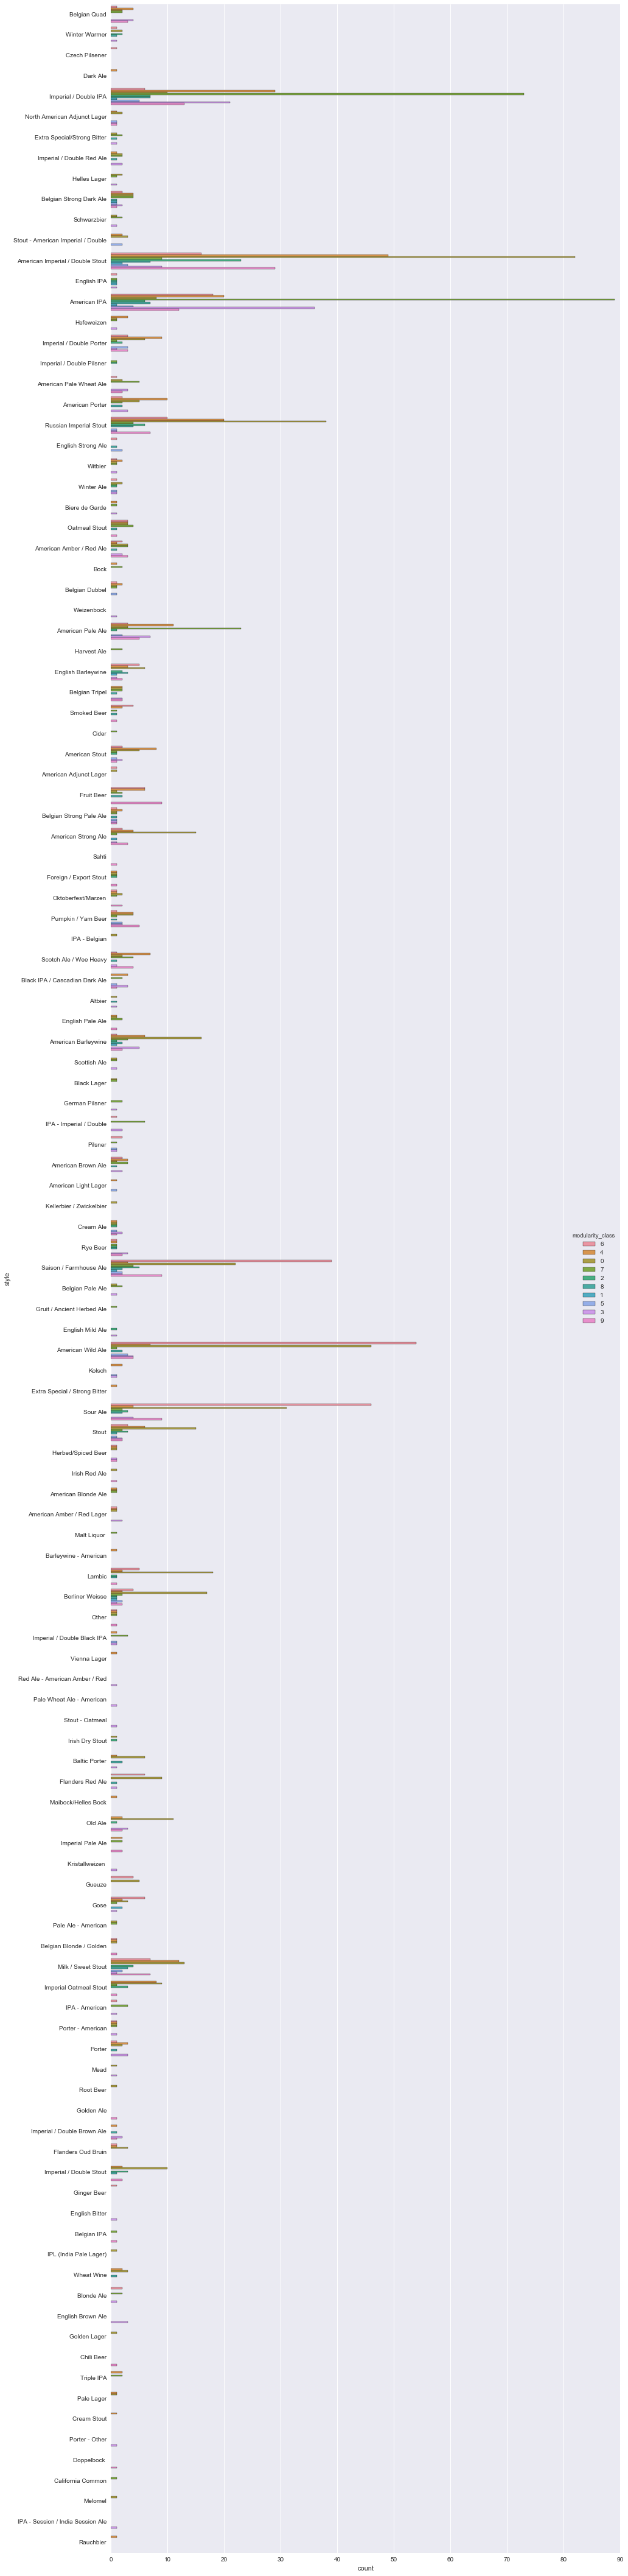

In [4]:
plt.figure(figsize=(15, 75))
sns.countplot(y='style', hue='modularity_class', data=df)
plt.show()

In [5]:
beers[beers['id'] == 13559]

,id,name,style
3099,13559,Zombie Dust,American Pale Ale


In [6]:
# count by mod_class styles
a = df.groupby(['modularity_class', 'style'], as_index=False).count()
# count by styles
b = df.groupby('style', as_index=False).count()
c = a.merge(b, on=['style'])
c = c.drop('modularity_class_y', axis=1)
c.columns = ['modularity_class', 'style', 'style_count', 'style_per']
c['style_per'] = c['style_count'] / c['style_per']
for mod_class in xrange(0, 9):
    print 'MOD CLASS: ' + str(mod_class)
    print
    print 'style count:'
    print c[c['modularity_class'] == mod_class].sort('style_count', ascending=False).head(10)[['style', 'style_count', 'style_per']]
    print
    print 'percent of total style count:'
    print c[c['modularity_class'] == mod_class].sort('style_per', ascending=False).head(10)[['style', 'style_count', 'style_per']]
    print
    print '----------------------'
    print

MOD CLASS: 0

style count:
                                style  style_count  style_per
44   American Imperial / Double Stout           82   0.358079
88                  American Wild Ale           46   0.380165
321            Russian Imperial Stout           38   0.417582
353                          Sour Ale           31   0.306931
330            Saison / Farmhouse Ale           22   0.247191
255                            Lambic           18   0.642857
141                   Berliner Weisse           17   0.515152
16                American Barleywine           16   0.432432
81                American Strong Ale           15   0.555556
361                             Stout           15   0.428571

percent of total style count:
                        style  style_count  style_per
263                   Melomel            1   1.000000
320                 Root Beer            1   1.000000
215             IPA - Belgian            1   1.000000
216    IPL (India Pale Lager)            1  

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
